# Discriminative model VS generative model
Discriminative model: used for predictions based on input

Generative model: generate a set of features (output) with the noise and sometimes a class as inputs

The noise is used for the model to generate diverse features

# GANs
Generative Adversarial Networks (GANs): GANs is a neural network architecture that are used for generating new examples for image datasets in various domains

GANs consists two neural network, the generator and the discriminator. They are trained simultaneously through adversarial training. The geneator takes random noise as input and try to produce realistic data (eg. images), while the discriminator takes in both real data and the data produced by the generator and trying to distinguish which one is real

During training, the generator tries to produce data that the discriminator can’t distinguish from real data, while the discriminator tries to get better at differentiating real data from fake data. The two networks are in essence competing in a game, so both networks improves at the same time

At the end, the generator will be able to produce realistic images that the discriminator cannot distingish from real data

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*20eOTTCwC-jGXpbAoc9yVg.png" width=700>

## Discriminator
The discriminator is a binary classsifier that trys to predict the probability of an input data being real or fake, where

$$output = P(Y|X)$$

$P(Y|X)$: the probability (between 0 and 1) of an input being real/fake. An probability of 0 indicates that the input data is 100% fake and 1 indicates that the input data is 100% real

$X$: the input data, can be real images or generated images by the generator

$Y$: the class categories (real or fake in this case)

In general, the architecture of the discriminator is the same as the traditional CNN with the following layers: convolutional layers, batch norm layers, pooling layers, activations functions, fully connected layers, and the output layer

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*e0Dnwo9V92Tjkv_PAJj5fQ.png" width=700>

### Binary cross entropy loss (BCE)
The discriminator is a binary classificer since it only predicts whether the given input is real or fake, so the loss funtion is the traditional BCE loss function, given by

$$ J(\theta) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[ (y^{(i)}) \log\left(\hat {y^{(i)}}) \right) + \left( 1 - y^{(i)}\right) \log \left( 1 - \hat {y^{(i)}}) \right) \right]$$

$J(\theta)$: the average loss over all training examples within a batch

$\theta$: the parameters of the discriminator

$m$: the number of training examples in a batch

$y^{(i)}$: the true label of the $i$th training example (real/fake)

$\hat {y^{(i)}}$: the label of the $i$th training example predicted by the discriminator. It depends on the input features of each training example, $x^{(i)}$, and the parameters of the discriminator, $\theta$

## Generator
The generator will take in a random noise vector, $\xi$, to generate a set of features, $\hat {X}$, that will produce a realistic image (Different noies vectors ensure the outputs are diverse). Then, the output, $\hat {X}$, will be the input to the discriminator, and the parameters of the generator will be updated based on the prediction given by the discriminator

The generator also uses the BCE loss function, and during calculation, all generated data will have labels of 1, so the input to the BCE loss function are a tensor with value predicted by the discriminator and a label tensor with all values equal to 1. This tells the generator how far it is for the generated data to real data (We only label generated data with 1 when training the generator, otherwise it would confuse the discriminator)

During training, the generator will learn to capture the distribution of data, so more commonly seen data will have a higher probability of being generated


## GAN training
In GAN training, the process is alternating, meaning only one network (whether the generator or the discriminator) will be updated everytime. Also, the training requires both networks to have similar skill level without one network significantly outperforming the other; otherwise, the superior network will always give very accurate perdictions and pervent the other network to learn

Process:

1. Input some random noises, $\xi$, to the generator and output some features, $\hat {X}$

2. Combine the generated features, $\hat {X}$, and real features, $X$, and input them into the discriminator

3. Let the discriminator makes the predictions, $\hat Y$, and use the predictions to compute cost and update the discriminator's parameters (Only update the discriminator)

4. Input some random noises to the generator and output some features

5. Only input the generated features into the discriminator to make predictions

6. Calculate the cost with all labels of the generated features to be one, this shows how far the generated features are away from real examples

7. Use the cost to update the generator parameters (Only update the generator)


# Activation functions
Activation functions must be differentiable and non-linear. Differentiable ensures the network can learn from backpropagation; non-linear ensures the network can learn a complex pattern (otherwise, any network with linear activations can be collapsed into a simple linear regression model)

## Common activation functions
1. ReLU
2. Leaky ReLU
3. Sigmoid
4. Tanh

## Dying ReLU problem
When most of the neurons takes in negative input and output zero, the gradient of the ReLU function is always 0, so the weights stop getting updated and the network stops learning. Once it becomes dead, it is impossible to recover the network to learn

Leaky ReLU can effectively solve this problem

## Vanishing gradient
When the inputs to the sigmoid and tanh activation function are large (both positive and negative), the gradients used to update the weights during backpropagation is very close to 0. This makes it hard for the network to learn because the weights of the earlier layers change, which slows down or stops training

This can be solved using normalization, gradient clipping, etc


# Batch norm
When features have significantly different distribution, it can be difficult and slow for the network to learn and perform gradient descent. Batch normalization performs normalization at each hidden layer to smooths the cost function and reduce the internal covariate shift to speed up training and provide more stable performance

Process:
1. Take the activation, $z$, from the previous layer and normalize it to $z_{norm}$ have mean of 0 and standard deviation of 1
2. Set $z_{out} = \gamma z_{norm} + \beta$. $\gamma$ and $\beta$ are shift factors that control the mean and standard deviation of the output, $z_{out}$. These are parameters that are learned during training, which means the output, $z_{out}$, does not need to have a fixed mean of 0 and standard deviation of 1; rather, the most optimal mean and standard deviation values for the data set are adjusted and learned during the training

During testing, we will use the parameters learned from the training to make the distribution of the test data as similar to the training data as possible to improve the models' performance 

Detailed implemetation of batch norm: https://github.com/guaaaaa/My_ML_Notebook/blob/master/Neural%20network.ipynb

# Transpose convolution
Transpose convolution is used to upsample the feature maps by using a filter. The parameters of the filter can be learned during training. 

One issue with transpose convolution is that some pixels will be the sum from multiple filters, which can result in a checkerboard pattern.

<img src="https://www.jeremyjordan.me/content/images/2018/05/Screen-Shot-2018-05-19-at-3.12.51-PM.png" width=800>

# Mode collapse
In GANs, mode collapse happens when the generator focuses on only producing limited set of data that can decieves the discriminator but does not captures the full diversity of the data distribution

For example, in a GAN that can generate hand written digits (from 0 to 9). The feature space should have 10 local minima with each minima represents the peak distribution of each digit; this is called a mode

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*XVzW4smMmN6WZpBTrCMldA.png" width=700>

However, as the training progresses, the generator may find the generated digit 1 can fool the discriminator more easily than any other generated digits, so the generator will only generator 1 but not other characters, which means the generator converges to a single local minimum, and it gets stuck producing other mode of data


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iYSy1UlFtGcpWRFquJiqPA.png" width=700>


# Issue with BCE loss function
Mode collape is primarily caused by the BCE loss function. The goal of the generator is to model a similar distribution as the real data. However, during the training process, the discriminator's job is easier than the generator's job and will learn faster, so as the training progresses, the discriminator will likely to output a value very close to 0 or 1. This results in vanishing gradient problem, so the generator does not know how to improve and get stuck at a single local minimum

# Wasserstein loss
The W-loss function calculate the loss by using Wasserstein distance. The W-distance is the minimum cost of converting the generated distribution, $g$, into the real distribution, $r$.

<img src="https://www.researchgate.net/publication/349704621/figure/fig1/AS:996752224161799@1614655657970/Schematic-of-the-L-2-Wasserstein-distance-We-here-consider-optimal-transport-from-the.png" width=500>

W-loss function

$$loss = \mathbb{E}(c(X)) - \mathbb{E}(c(\hat X))$$

$\mathbb{E}$: the expected value (average)

$c$: the critic, which is equivalent to the discriminator but can output any real number while the discriminator only output value between 0 and 1

$X, \hat X$: the features of a real example and the features of a generated example respectively

The critics tries to maximize the differences between the two expected values to distinguish the real and generated example. The generator tries to minimize the differences to make the generated features close to the real features

Compared to the BCE loss, which only outputs a number between 0 and 1, the W-loss function can output any real number. This helps with the vanishing gradient problem and mode collapse

## 1-Lipschitz continuous
To use the W-loss, the critic need to be 1-L continuous, which means the gradient of the loss function must be a value between -1 and 1. This means that the W-loss function grows linearly to maintain the stability during training

To enforce 1-L continuous, we can use

1. Weight clipping: force the weights of the critics to be a specific interval of values. However, weight clipping can limit the performance of the critics

2. Gradient penalty: a softer constrains to encourage 1-L continuity by adding a regularization term that penalize the critic when its gradient is greater than 1, so the loss function become

$$loss = \mathbb{E}(c(r)) - \mathbb{E}(c(g)) + \lambda_{reg}$$

It's impossible to check the gradient of every single point on the loss function, so we randomly interpolate an images, $\hat X$,by combining a generated image and a real images with the factor $\epsilon$, where

$$\hat X = \epsilon r + (1 - \epsilon) g$$

$\hat X$: randomly interpolated image

$\epsilon$: a real number between 0 and 1

$r, g$: the real and generated image respectively

Thus, the regularization term is

$$\lambda_{reg} = \lambda \mathbb{E}(||\nabla c(\hat X)||_2 - 1)^2$$

$\lambda$: penalty coefficient

$||\nabla c(\hat X)||_2$: the L-2 norm of the gradient of critic on the interpolated image

The given function encourges the model to have gradient of 1 since when the gradient is one, the additional cost if 0. If the gradient is significantly larger than 1, the regularization term will be large to penalize the critic

# Conditional generation
Conditional GAN is a type of GAN that takes in a condition (class) as input and generates based on the given condition. This means that the model should be trained on labeled data

In addition to a noise vector, the generator also takes in a one-hot vector that contains the information of the desired class. Two vectors will be concatenate into one large vector as the input. The goal of the generator is to generate an output that looks realistic and matches the input class

Similarly, the discriminator will take in an image and a class label. It will only predict real if the input image is realistic and matches the class label. To train the discriminator, we use labeled dataset like training a multiclass classification model

To pass in the class information into the discriminator, we use one-hot matrices where the number of matrices is the same as total number of class. Only the matrix that represents the class will be all 1, other matrices will be filled with 0

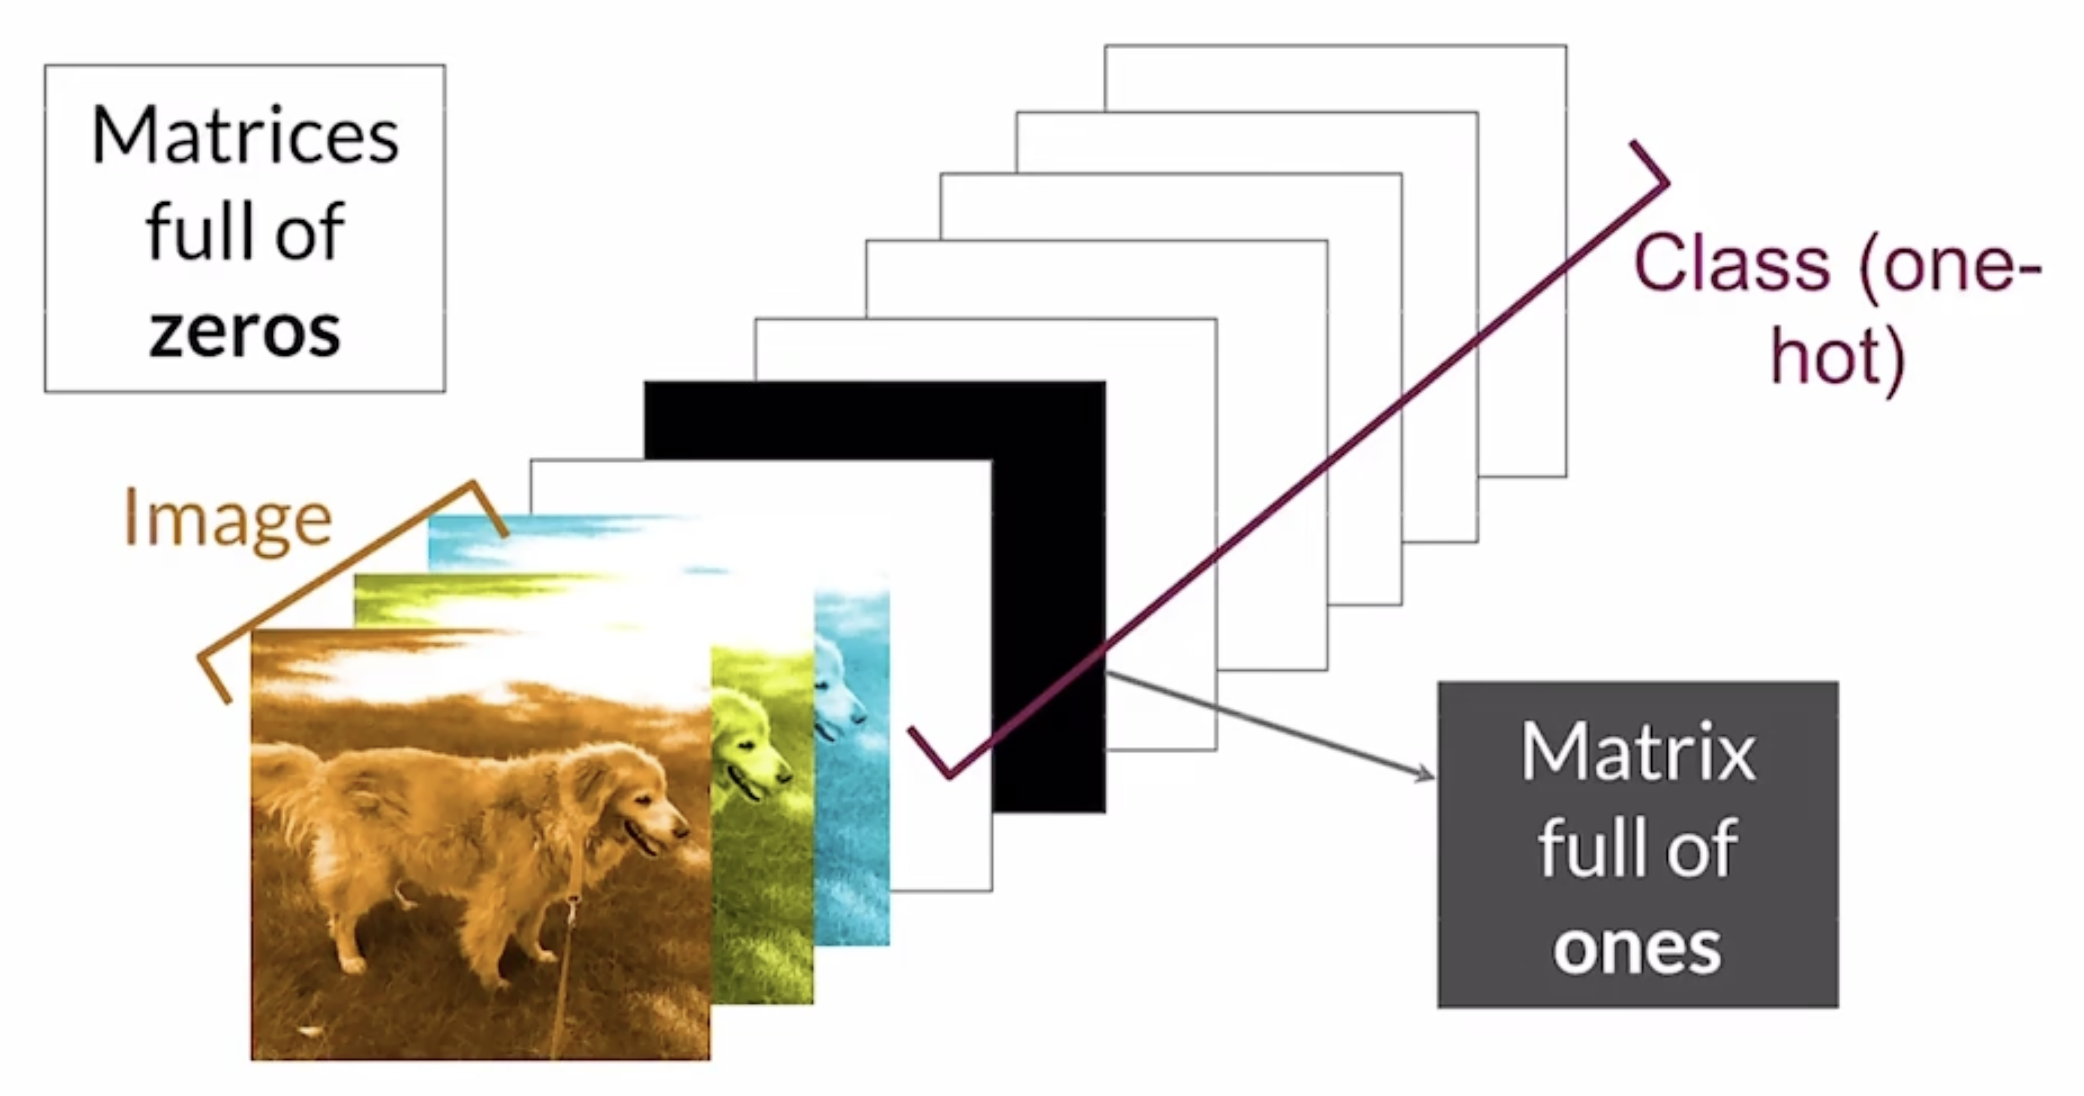

# Controllable generation
Controllable generation allows the user to control the generated feature (eg. hair colour, age, etc). This is done by tweaking the input noise vector. Compared to conditional generation, controllable generation does not need a labeled training set or class information (it's only controlled by the input noise vector)

# Feature manipulations
## Z space
Z space is the space of all noise vectors. In the Z space, two vectors close together will have similar features, and two vectors that are further apart will have different features

To find the vector that controls a specific feature, we find the two vector that gives the exact same output except the wanted feature (eg. the same woman, one with red hair and one with blue hair). The vector that can turns the features of hair colour from red to blue is given by the difference of that two noise vectors. By adding this vector to any noise vector that outputs someone with red hair, the output will be the same person but with blue hair

## Challenges
1. Correlation of features: some features are likely to have strong correlations (like beard and masculinity), so changes on one feature (adding beard) can cause changes on other features (face become more masculine) even that's not the intention

2. Vector space entanglement: one entry in the noise vector can impact multiple features, even those features may not have actual correlations. This is because the dimension of the noise vector is too small comparing to the number of features we want to control, so the noise vector cannot have a one to one correlation with the features. For exmample, if we want to control 100 features using a vector of size 5, it's impossible to have individual control on every single feature

<img src="https://miro.medium.com/v2/resize:fit:601/1*JcdGoZU6hFSnK4JghcJRxw.png">

# Classifier gradient
To find a specific vector in the Z space that can control a specific feature, we feed some noise to the generator to get some outputs. Then, we feed the outputs to into a pre-trained classifier to detect whether the generated outputs have the features we wanted. Based on the prediction, we update the noise vector until the generator can generate the feature we wanted

Note: the process is done after training the generator, so the weights in the generator should not be modified

# Disentanglement
With a disentangled Z space, we can change on feature in the output without changing other features. In general, a disentangled Z space requires more entries in the noise vector than the number of features we want to control

Latent factors: the components of the noise vector that can impact the output features, but cannot be directly observed

# Evaluation
Evaluation of a GAN model can be difficult since there's no ground truth to check with. Therefore, we use fidelity and diversity as two important metrics to evaluate a GAN

* Fidelity: the quality of each generated image (how realistics the generated images are)

* Diversity: the distribution of generated images (does the model captures the real distribution of data)

## Comparing images
To compare how similar two images are, we can use their feature distance by extracting higher level features of the images and then compare. This is a more reliable way than pixel distance

To extract features from an image, we use a pre-trained classifier (eg. Inception-v3) by passing in the image as input and extract the embedding / feature map from a middle layer. This embedding contains information about the features present in the input image. An embedding extracted from a later layer has more higher level features, where an extraction from a ealier layer has more lower level features. The extracted embedding is given by $\Phi (X)$, where $\Phi$ is a function based on the selected pre-trained classifier and $X$ is the input image

Then, we can compare two images based on their embedding

## Frechet inception distance (FID)
FID is a metric that calculates the feature distance between the real and generated images. Lower scores indicate the two groups of images are more similar, a 0 score indicates the two images are identical

### Covariant matrix
Covariance is a measure of the joint variability of two random variables; it indicates how the two variables vary together

A Convariant matrix represents the covariance values of each pair of variables in multivariate data; along the diagonal, the value represents the variance of each variable. If a non-diagonal entry is 0, it means that the two variables are independent from each other. In our case, each variable represents a feature, so the covariant matrix, $\Sigma$, measures the distribution of each feature within a set (eg. a group of real/fake images), and how each feature is related to another feature

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*J6z7xcleH9wxHGGCLvDptg.jpeg" width=700>

### FID formula
Given two images / two groups of images, $X, Y$, and their covariant matrices, $\Sigma_X, \Sigma_Y$, the FID is calculated by

$$FID = ||\mu_X - \mu_Y||^2 + Tr(\Sigma_X + \Sigma_Y - 2\sqrt{\Sigma_X\Sigma_Y})$$

$\mu_X, \mu_Y$: the mean of $X$ and $Y$; in multivariable case, both $X$ and $Y$ are vectors with each entry representing the mean of a single feature

$Tr$: the trace of a matrix (sum of all diagonal elements)

$\Sigma_X, \Sigma_Y$: the covariant matrices of image $X$ and $Y$

### FID limitations
* FID uses a pre-trained Inception model trained on ImageNet, which may not capture key features in all cases
* Need large sample size
* Slow to run
* Use limited statistics (only mean and covariance)

## Inception score (IS)
Inception score is another method for evaluating GANs. First, we feed some generated images into the Inception model, but instead of extracting the features from a middle layer, we uses the classifier output

* Fidelity (low entropy): the fidelity of a GAN is measured by $p(y|x)$, which means the classifier should be confident which class the input images belongs to. So given a generated image, $x$, the prediction on a class $y$ should be high, indicating a defined, high peak

* Diversity (high entrpoy): the diversity of a GAN is measured by $p(y)$, which means the GAN should be able to generate all classes in the set instead of only generating a subset

Thus, idealy, a good GAN should be model the distribution with the number of peaks equals the number of total number of classes (high diversity) with each peak being high and defined (high fidelity)

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xLq69Oj6_4NRZoWleg9K_Q.png">

### KL divergence
KL divergence measures how different two given distributions are. KL divergence is high when our distributions are dissimilar. That is, it is high when each generated image has a distinct label and the overall set of generated images has a diverse range of labels. Ideally, the label distribution and the margin distribution should be vastly different  

KL divergence is calculated by

$$D_{KL}(p(y|x)||p(y)) = p(y|x) \log(\frac{p(y|x)}{p(y)})$$


The IS score is then calcualted by

$$IS = exp(\mathbb{E}_{x \sim p} D_{KL}(p(y|x)||p(y)))$$

In general, a higher IS score indicates a better GAN

### Limitations
1. If the generator generates only one image per classifier image class, repeating each image many times, it can score highly
2. The IS score only looks at generated images but not the real images
3. If the generator memorizes the training data and replicates it, it can score highly
3. The IS score uses a pre-trained Inception model trained on ImageNet, which may not capture key features in all cases (eg. generate a class that's not in the Inception network dataset can lead to always lot IS score)

## Sampling
When evaluating GAN, the real images can be sampled using the normal distribution of data. For fake images, the images being sampled can greatly impact the evaluation result of GAN. Therefore, we use the truncation trick to ensures we only samples from the distribution we want.

Truncation trick will only sample noise vectors within a distance, $d$, from the mean of the distribution, where $d$ is a hyperparameters. Higher value of $d$ means a larger area of the distribution is covered, making the samples to have higher diversity but lower fidelity. Lower value of $d$ means a smaller area of the distribution is covered, making the samples to have lower diversity but higher fidelity

However, the FID may not works well with the truncation trick since FID requires the sample to have both high diversity and fidelity, but the truncation trick focus more on one of those aspect. Therefore, the method of evaluation highly depends on the application of the model, and human evaluation is also an crucial part

## Precision and recall for GAN
$P_r$ represents the distribution of the real samples, and $P_g$ represents the distribution of the generated samples. Ideally, we want the generated distribution to be the exact same as the real distribution (not a subset or super set of it)

* Precision (Fidelity)
$$Precision = \frac{P_r \bigcup P_g}{P_g}$$

Precision represents the percentage of the generated examples that look real. Higher precision indicates higher fidelity, meaning more generated examples will look real. However, a 100% percentage does not mean the GAN is perfect since $P_g$ can be a subset of $P_r$ and does not fully capture and real distribution

* Recall (Diversity)
$$Recall = \frac{P_r \bigcup P_g}{P_r}$$

Recall represents the percentage of the real distribution that is covered by the generated distribution. Higher recall indicates higher diveristy, meaning the generated distribution can capture more real distribution. However, a 100% recall may occur when $P_g$ is a superset of $P_r$. This means the generator can generate all real distribution, but also things that does not look real  (The truncation trick can help to resolve this issue)

<img src="https://www.researchgate.net/publication/350132222/figure/fig9/AS:1002549385629711@1616037808862/a-Illustration-of-precision-recall-for-distribution-of-real-images-Pr-blue-and-the.ppm">

# Disadvantage of GANs
1. Lack of instrinsic evaluation metrics (require inspections on many generate samples)
2. Unstable and slow training process
3. No density estimation (it is very difficult to estimate the distribution of the generator, like how often would a specific feature be generated)
4. Invertion process (taking in an image and output put its noise vector) is difficult. Invertion can be helpful to build better controllable GAN

# Alternatives of GAN
## Variational Autoencoder (VAE)
VAE is a type of generative neural network architecture that consists a encoder and a decoder

* Traditional autoencoder
<img src="https://miro.medium.com/v2/resize:fit:1234/format:webp/1*qVx8wDUpqIqpEWy6-fW3Cg.png" width=400>

* VAE
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*kXiln_TbF15oVg7AjcUEkQ.png" width=400>

* Encoder: the encoder takes an input and compress it into a latent representation. Traditional autoencoder outputs a single point (vector) in the latent space. A VAE output a probability distribution over the latent space

* Decoder: the decoder samples from the distribution in the latent space given by the encoder and try to reconstruct the input as accurately as possible by upsampling the encoding

After training, we will remove the encoder and randomly sample from the distribution in the latent space to produce output

### Issue with traditional autoencoder and advantages of VAE
Traditional autoencoder will convert input data into points in the latent space, which are discrete. However, during generation, we can only sample from those discrete points, meaning we're essentially replicating the same set of images. If we use a data point that's not in this discontinuous latent space, the decoder output will be unrealistics since it has never been trained on those inputs.

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*-i8cp3ry4XS-05OWPAJLPg.png" width=300>

Compare to traditional autoencoder, VAE has the advantage of:
1. VAE learns the distribution of the input data and can generate sample similar to original input
2. Since the VAE encoder outputs a distribution, its latent space is smooth and continuous, meaning we can interpolate between 2 points and generate outputs with smooth transition
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*96ho7qSyW0nKrLvSoZHOtA.png">

### Encoder
In order to output a distribution, the encoder outputs will output 2 vectors, one for the means, $\mu$, and one for the standard deviations, $\sigma$, where each pair of $\mu$ and $\sigma$ represents the distribution of 1 feature in the embedding of the input. With these 2 vectors, we can randomly sample each feature to form an encoding and pass it on to the decoder

<img src="https://miro.medium.com/v2/resize:fit:1314/format:webp/1*CiVcrrPmpcB1YGMkTF7hzA.png" width=500>

VAEs has density estimation, invertiable, and has more stable training compared to GANs, but it also generates lower quality results

## Loss function
### Loss for traditional autoencoder
The loss function for a traditional autoencoder is simply the binary cross entropy loss or MSE loss. This loss function tells the model how different is the generated image and the input image. This loss is called the reconstruction loss

<img src="https://miro.medium.com/v2/resize:fit:1400/0*zLOeTMUQ67OrqjLp.png" width=600>
<img src="https://miro.medium.com/v2/resize:fit:808/1*-e1QGatrODWpJkEwqP4Jyg.png" width=300>

$y_i$: the given input image/its feature map

$\hat{y_i}$: the generated image by the decoder/its feature map

$N$: number of pixels in the image/number of element in the extracted feature map

The reconsturction loss can either be calculated on based on the pixel distance between the input and generated images or the distance of their feature map. The feature map of the image can be obtained by passing it into a pre-trained network and extract the activation from a middle layer. In general, the feature map is more realiable than the pixel distance


### KL divergence term 
One issue the encoder may experience using reconstruction loss is that the range of $\mu$ and $\sigma$ for each class can be very different, which means there will be discontinuity between in between the distributions. However, we want to make the mean of each class somewhat close to each other so the model will be able to generate output in between classes

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*xCjoga9IPyNUSiz9E7ao7A.png" width=500>

To resolve this problem, we need to introduce a KL divergence term to the loss function. This term measures the difference between the learned probability distribution over the latent space and a predefined prior distribution (usually a standard normal distribution). Minimizing this term will ensure that the learned distribution over the latent space is close to the prior distribution, which means the mean and standard deviation of each class will have very similar value.

Note: the predefined prior distribution is arbitrary; it only tells the model where we want all the distribution to be centered at

<img src="https://miro.medium.com/v2/resize:fit:1040/format:webp/1*uEAxCmyVKxzZOJG6afkCCg.png" width=300>

$n$: number of elements in the $\mu$ or $\sigma$ vector (they have the same size)

$\mu_i$: the $i$th element in the $\mu$ vector

$\sigma_i$: the $i$th element in the $\sigma$ vector

In this case, we choose the predefined distribution to be the normal distribution with mean of 0 and standard deviation of 1. Therefore, this loss function forces the output $\mu$ and $\sigma$ vector to take on similar values

However, if we only use the KL divergence loss without the reconstruction loss, the distribution for all classes are densely placed and the decoder cannot decode any valuable information from it, so the reconstruction term and the KL divergence term should be used together to make up the loss function

* Distribution by only using KL divergence term as loss function (results in posterior collapse issue)
<img src="https://miro.medium.com/v2/resize:fit:1294/format:webp/1*XdSPoB3rcb7LymviDJBJUg.png" width=350>

* Distribution by using both reconstruction cost and KL divergence term as loss function (results in dense, but distinguishable distribution)
<img src="https://miro.medium.com/v2/resize:fit:1286/format:webp/1*BIDBG8MQ9-Kc-knUUrkT3A.png" width=350>

### Full VAE loss function
The loss function used for VAE is reconstruction loss and KL divergence term; we want to minimize both term at the same time

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*DJeT99qHwbF7iewk.png" width=700>

$L$: ELBO (Expectation Lower BOund), which is essentially the total loss that we try to minimize

$x^{(i)}$: the input image

$\theta, \phi$: parameters of the decoder and the encoder respectively

$z$: sampled latent variable

$p_{\theta}(x^{(i)}|z)$: the expectation of the log probability of the data given the latent variable $z$. It measures that given a input latent vector $z$, how well the decoder can reconstruct it to match the input image, $x^{(i)}$

$p_{\theta}(z)$: the predefined prior distribution (normal distribution is most commonly used)

$q_{\phi}(z|x^{(i)})$: the output distribution by the encoder given a input image $x^{(i)}$

## Training process
1. Feed an image to the encoder, which outputs parameters $\mu$ and $\sigma$ of the latent distribution
2. Sample a latent variable $z$ based on $\mu$ and $\sigma$ using the reparametrization trick
3. Feed the latent variable to the decoder to generate a output image $\hat{x}$
4. Compute the loss using ELBO loss function
5. Use gradient descent to minize the ELBO loss and update the model's parameters

### Reparametrization trick
To generate a latent variable, we sample a random variable from the distribution based on $\mu$ and $\sigma$. However, backpropagation requires calculating the gradients with respect to the model’s parameters ($\mu$ and $\sigma$), but calculating the gradient with respect to z (a randomly sampled variable) is mathematically undefined. The reparametrization trick solve this problem

Instead of directly sampling $z$ from its distribution, we decompose z into a deterministic component and a stochastic component by introducing a new random variable $\epsilon$, where $\epsilon$ is randomly sampled from the standard normal distribution. So the latent variable is now calculated as

$$z = \mu + \epsilon * \sigma$$

Now, $z$ still captures the original distribution based on $\mu$ and $\sigma$ to properly perform backpropagation while $\epsilon$ introduce randomness to the sampling process

## Flow model
